<a href="https://colab.research.google.com/github/NathanPhilipB/Heart_Disease_Predicition_NATHANPHILIPB/blob/main/Heart_Disease_Prediction_NATHANPHILIPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT DATASET

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishidamarla/heart-disease-prediction

  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 7.40MB/s]


In [ ]:
! unzip /content/heart-disease-prediction.zip

Archive:  /content/heart-disease-prediction.zip
  inflating: Heart_Disease_Prediction.csv  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
0                          3         3      Presence  
1                          0         7       Absence  
2                          0         7      Presence  
3                          1         7       Absence  
4                          1         3       Absence  
..                       ...       ...           ...  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence  

[270 rows x 14 columns]

#CHECK MISSING VALUES

In [ ]:
len(df.columns)

14

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

#ONE-HOT ENCODE TARGET COLUMN

In [ ]:
df0 = pd.get_dummies(df, columns = ['Heart Disease'])
df0

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium  Heart Disease_Absence  \
0                          3         3                      0   
1                          0         7                      1   
2                          0         7                      0   
3                          1         7                      1   
4                          1         3                      1   
..                       ...       ...                    ...   
265                        0         7                      1   
266                        0         7                      1   
267                        0         3                      1   
268                        0         6                      1   
269                        3         3                      0   

     Heart Disease_Presence  
0                         1  
1                         0  
2                         1  
3                         0  
4                         0  
..                      ...  
265                       0  
266                       0  
267                       0  
268                       0  
269                       1  

[270 rows x 15 columns]

In [ ]:
df0=df0.drop(['Heart Disease_Absence'], axis=1)
df0

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium  Heart Disease_Presence  
0                          3         3                       1  
1                          0         7                       0  
2                          0         7                       1  
3                          1         7                       0  
4                          1         3                       0  
..                       ...       ...                     ...  
265                        0         7                       0  
266                        0         7                       0  
267                        0         3                       0  
268                        0         6                       0  
269                        3         3                       1  

[270 rows x 14 columns]

In [ ]:
for column in df0.columns:
  print(df0[column].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
uint8


#BALANCE

In [ ]:
dfp = df[df["Heart Disease"] == "Presence"]
Pos_count=len(dfp)
Pos_count

120

In [ ]:
dfn = df[df["Heart Disease"] == "Absence"]
Neg_count=len(dfn)
Neg_count

150

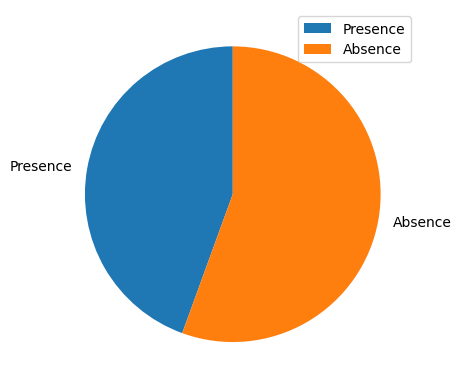

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Pos_count, Neg_count])
mylabels = ["Presence", "Absence"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.legend(loc=1)
plt.show()

In [ ]:
rows_to_drop = dfn.sample(n=30)
dfn1 = dfn.drop(rows_to_drop.index)
dfn1

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
1     67    0                3  115          564             0            2   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
5     65    1                4  120          177             0            0   
10    59    1                4  135          234             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
259   43    1                4  150          247             0            0   
260   58    0                3  120          340             0            0   
265   52    1                3  172          199             1            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   

     Max HR  Exercise angina  ST depression  Slope of ST  \
1       160                0            1.6            2   
3       105                1            0.2            2   
4       121                1            0.2            1   
5       140                0            0.4            1   
10      161                0            0.5            2   
..      ...              ...            ...          ...   
259     171                0            1.5            1   
260     172                0            0.0            1   
265     162                0            0.5            1   
267     153                0            1.3            2   
268     148                0            0.4            2   

     Number of vessels fluro  Thallium Heart Disease  
1                          0         7       Absence  
3                          1         7       Absence  
4                          1         3       Absence  
5                          0         7       Absence  
10                         0         7       Absence  
..                       ...       ...           ...  
259                        0         3       Absence  
260                        0         3       Absence  
265                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  

[120 rows x 14 columns]

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

dfm = pd.merge(dfp, dfn1, how='outer')

dfm = shuffle(dfm)
dfm=dfm.reset_index()
dfm = dfm.drop('index', axis=1)
dfm

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     42    0                4  102          265             0            2   
1     62    0                4  138          294             1            0   
2     62    1                2  120          281             0            2   
3     59    1                4  110          239             0            2   
4     52    1                4  112          230             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
235   53    1                4  142          226             0            2   
236   63    1                1  145          233             1            2   
237   67    1                4  125          254             1            0   
238   57    1                3  128          229             0            2   
239   54    1                4  110          239             0            0   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       122                0            0.6            2   
1       106                0            1.9            2   
2       103                0            1.4            2   
3       142                1            1.2            2   
4       160                0            0.0            1   
..      ...              ...            ...          ...   
235     111                1            0.0            1   
236     150                0            2.3            3   
237     163                0            0.2            2   
238     150                0            0.4            2   
239     126                1            2.8            2   

     Number of vessels fluro  Thallium Heart Disease  
0                          0         3       Absence  
1                          3         3      Presence  
2                          1         7      Presence  
3                          1         7      Presence  
4                          1         3      Presence  
..                       ...       ...           ...  
235                        0         7       Absence  
236                        0         6       Absence  
237                        2         7      Presence  
238                        1         7      Presence  
239                        1         7      Presence  

[240 rows x 14 columns]

In [ ]:
Pos_count = len(dfp)
Neg_count = len(dfn1)

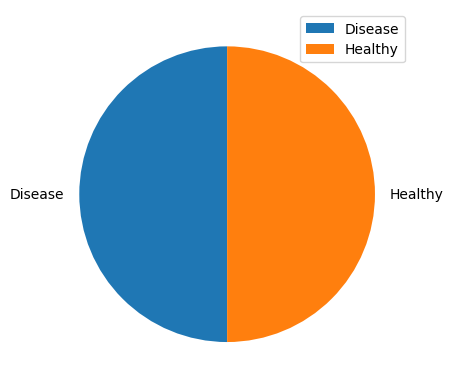

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Pos_count, Neg_count])
mylabels = ["Disease", "Healthy"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.legend(loc=1)
plt.show()

#NORMALISATION, BALANCED, SPLIT


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()

df1 = scaler.fit_transform(dfm.drop('Heart Disease', axis=1))

In [ ]:
df1=pd.DataFrame(df1, columns=['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'])

In [ ]:
df1

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.270833  0.0         1.000000  0.075472     0.317352           0.0   
1    0.687500  0.0         1.000000  0.415094     0.383562           1.0   
2    0.687500  1.0         0.333333  0.245283     0.353881           0.0   
3    0.625000  1.0         1.000000  0.150943     0.257991           0.0   
4    0.479167  1.0         1.000000  0.169811     0.237443           0.0   
..        ...  ...              ...       ...          ...           ...   
235  0.500000  1.0         1.000000  0.452830     0.228311           0.0   
236  0.708333  1.0         0.000000  0.481132     0.244292           1.0   
237  0.791667  1.0         1.000000  0.292453     0.292237           1.0   
238  0.583333  1.0         0.666667  0.320755     0.235160           0.0   
239  0.520833  1.0         1.000000  0.150943     0.257991           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.389313              0.0       0.096774          0.5   
1            0.0  0.267176              0.0       0.306452          0.5   
2            1.0  0.244275              0.0       0.225806          0.5   
3            1.0  0.541985              1.0       0.193548          0.5   
4            0.0  0.679389              0.0       0.000000          0.0   
..           ...       ...              ...            ...          ...   
235          1.0  0.305344              1.0       0.000000          0.0   
236          1.0  0.603053              0.0       0.370968          1.0   
237          0.0  0.702290              0.0       0.032258          0.5   
238          1.0  0.603053              0.0       0.064516          0.5   
239          0.0  0.419847              1.0       0.451613          0.5   

     Number of vessels fluro  Thallium  
0                   0.000000      0.00  
1                   1.000000      0.00  
2                   0.333333      1.00  
3                   0.333333      1.00  
4                   0.333333      0.00  
..                       ...       ...  
235                 0.000000      1.00  
236                 0.000000      0.75  
237                 0.666667      1.00  
238                 0.333333      1.00  
239                 0.333333      1.00  

[240 rows x 13 columns]

In [ ]:
for column in df1.columns:
  print(df1[column].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
df1.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

#NORMALISED, BALANCED, NO SPLIT

In [ ]:
mX = df1
mX

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.270833  0.0         1.000000  0.075472     0.317352           0.0   
1    0.687500  0.0         1.000000  0.415094     0.383562           1.0   
2    0.687500  1.0         0.333333  0.245283     0.353881           0.0   
3    0.625000  1.0         1.000000  0.150943     0.257991           0.0   
4    0.479167  1.0         1.000000  0.169811     0.237443           0.0   
..        ...  ...              ...       ...          ...           ...   
235  0.500000  1.0         1.000000  0.452830     0.228311           0.0   
236  0.708333  1.0         0.000000  0.481132     0.244292           1.0   
237  0.791667  1.0         1.000000  0.292453     0.292237           1.0   
238  0.583333  1.0         0.666667  0.320755     0.235160           0.0   
239  0.520833  1.0         1.000000  0.150943     0.257991           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.389313              0.0       0.096774          0.5   
1            0.0  0.267176              0.0       0.306452          0.5   
2            1.0  0.244275              0.0       0.225806          0.5   
3            1.0  0.541985              1.0       0.193548          0.5   
4            0.0  0.679389              0.0       0.000000          0.0   
..           ...       ...              ...            ...          ...   
235          1.0  0.305344              1.0       0.000000          0.0   
236          1.0  0.603053              0.0       0.370968          1.0   
237          0.0  0.702290              0.0       0.032258          0.5   
238          1.0  0.603053              0.0       0.064516          0.5   
239          0.0  0.419847              1.0       0.451613          0.5   

     Number of vessels fluro  Thallium  
0                   0.000000      0.00  
1                   1.000000      0.00  
2                   0.333333      1.00  
3                   0.333333      1.00  
4                   0.333333      0.00  
..                       ...       ...  
235                 0.000000      1.00  
236                 0.000000      0.75  
237                 0.666667      1.00  
238                 0.333333      1.00  
239                 0.333333      1.00  

[240 rows x 13 columns]

In [ ]:
my = pd.DataFrame(dfm['Heart Disease'], columns=['Heart Disease'])
my

Heart Disease
0         Absence
1        Presence
2        Presence
3        Presence
4        Presence
..            ...
235       Absence
236       Absence
237      Presence
238      Presence
239      Presence

[240 rows x 1 columns]

#NORMALISATION, IMBALANCED, NO SPLIT

In [ ]:
df

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
0                          3         3      Presence  
1                          0         7       Absence  
2                          0         7      Presence  
3                          1         7       Absence  
4                          1         3       Absence  
..                       ...       ...           ...  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence  

[270 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()

df2 = scaler.fit_transform(df.drop('Heart Disease', axis=1))

In [ ]:
df2=pd.DataFrame(df2, columns=['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'])

In [ ]:
df2

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.854167  1.0         1.000000  0.339623     0.447489           0.0   
1    0.791667  0.0         0.666667  0.198113     1.000000           0.0   
2    0.583333  1.0         0.333333  0.283019     0.308219           0.0   
3    0.729167  1.0         1.000000  0.320755     0.312785           0.0   
4    0.937500  0.0         0.333333  0.245283     0.326484           0.0   
..        ...  ...              ...       ...          ...           ...   
265  0.479167  1.0         0.666667  0.735849     0.166667           1.0   
266  0.312500  1.0         0.333333  0.245283     0.312785           0.0   
267  0.562500  0.0         0.333333  0.433962     0.383562           0.0   
268  0.583333  1.0         1.000000  0.433962     0.150685           0.0   
269  0.791667  1.0         1.000000  0.622642     0.365297           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.290076              0.0       0.387097          0.5   
1            1.0  0.679389              0.0       0.258065          0.5   
2            0.0  0.534351              0.0       0.048387          0.0   
3            0.0  0.259542              1.0       0.032258          0.5   
4            1.0  0.381679              1.0       0.032258          0.0   
..           ...       ...              ...            ...          ...   
265          0.0  0.694656              0.0       0.080645          0.0   
266          0.0  0.778626              0.0       0.000000          0.0   
267          1.0  0.625954              0.0       0.209677          0.5   
268          0.0  0.587786              0.0       0.064516          0.5   
269          1.0  0.282443              1.0       0.241935          0.5   

     Number of vessels fluro  Thallium  
0                   1.000000      0.00  
1                   0.000000      1.00  
2                   0.000000      1.00  
3                   0.333333      1.00  
4                   0.333333      0.00  
..                       ...       ...  
265                 0.000000      1.00  
266                 0.000000      1.00  
267                 0.000000      0.00  
268                 0.000000      0.75  
269                 1.000000      0.00  

[270 rows x 13 columns]

In [ ]:
for column in df1.columns:
  print(df2[column].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
df2

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.854167  1.0         1.000000  0.339623     0.447489           0.0   
1    0.791667  0.0         0.666667  0.198113     1.000000           0.0   
2    0.583333  1.0         0.333333  0.283019     0.308219           0.0   
3    0.729167  1.0         1.000000  0.320755     0.312785           0.0   
4    0.937500  0.0         0.333333  0.245283     0.326484           0.0   
..        ...  ...              ...       ...          ...           ...   
265  0.479167  1.0         0.666667  0.735849     0.166667           1.0   
266  0.312500  1.0         0.333333  0.245283     0.312785           0.0   
267  0.562500  0.0         0.333333  0.433962     0.383562           0.0   
268  0.583333  1.0         1.000000  0.433962     0.150685           0.0   
269  0.791667  1.0         1.000000  0.622642     0.365297           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.290076              0.0       0.387097          0.5   
1            1.0  0.679389              0.0       0.258065          0.5   
2            0.0  0.534351              0.0       0.048387          0.0   
3            0.0  0.259542              1.0       0.032258          0.5   
4            1.0  0.381679              1.0       0.032258          0.0   
..           ...       ...              ...            ...          ...   
265          0.0  0.694656              0.0       0.080645          0.0   
266          0.0  0.778626              0.0       0.000000          0.0   
267          1.0  0.625954              0.0       0.209677          0.5   
268          0.0  0.587786              0.0       0.064516          0.5   
269          1.0  0.282443              1.0       0.241935          0.5   

     Number of vessels fluro  Thallium  
0                   1.000000      0.00  
1                   0.000000      1.00  
2                   0.000000      1.00  
3                   0.333333      1.00  
4                   0.333333      0.00  
..                       ...       ...  
265                 0.000000      1.00  
266                 0.000000      1.00  
267                 0.000000      0.00  
268                 0.000000      0.75  
269                 1.000000      0.00  

[270 rows x 13 columns]

##(for stratified KFOLD)

In [ ]:
X = df2
X

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.854167  1.0         1.000000  0.339623     0.447489           0.0   
1    0.791667  0.0         0.666667  0.198113     1.000000           0.0   
2    0.583333  1.0         0.333333  0.283019     0.308219           0.0   
3    0.729167  1.0         1.000000  0.320755     0.312785           0.0   
4    0.937500  0.0         0.333333  0.245283     0.326484           0.0   
..        ...  ...              ...       ...          ...           ...   
265  0.479167  1.0         0.666667  0.735849     0.166667           1.0   
266  0.312500  1.0         0.333333  0.245283     0.312785           0.0   
267  0.562500  0.0         0.333333  0.433962     0.383562           0.0   
268  0.583333  1.0         1.000000  0.433962     0.150685           0.0   
269  0.791667  1.0         1.000000  0.622642     0.365297           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.290076              0.0       0.387097          0.5   
1            1.0  0.679389              0.0       0.258065          0.5   
2            0.0  0.534351              0.0       0.048387          0.0   
3            0.0  0.259542              1.0       0.032258          0.5   
4            1.0  0.381679              1.0       0.032258          0.0   
..           ...       ...              ...            ...          ...   
265          0.0  0.694656              0.0       0.080645          0.0   
266          0.0  0.778626              0.0       0.000000          0.0   
267          1.0  0.625954              0.0       0.209677          0.5   
268          0.0  0.587786              0.0       0.064516          0.5   
269          1.0  0.282443              1.0       0.241935          0.5   

     Number of vessels fluro  Thallium  
0                   1.000000      0.00  
1                   0.000000      1.00  
2                   0.000000      1.00  
3                   0.333333      1.00  
4                   0.333333      0.00  
..                       ...       ...  
265                 0.000000      1.00  
266                 0.000000      1.00  
267                 0.000000      0.00  
268                 0.000000      0.75  
269                 1.000000      0.00  

[270 rows x 13 columns]

In [ ]:
y = pd.DataFrame(df['Heart Disease'], columns=['Heart Disease'])
y

Heart Disease
0        Presence
1         Absence
2        Presence
3         Absence
4         Absence
..            ...
265       Absence
266       Absence
267       Absence
268       Absence
269      Presence

[270 rows x 1 columns]

In [ ]:
dfp = y[y["Heart Disease"] == "Absence"]
Pos_count=len(dfp)
Pos_count

150

#CORRELATION

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.133507         0.092082  0.267322   
Sex                     -0.133507  1.000000         0.065460 -0.083360   
Chest pain type          0.092082  0.065460         1.000000 -0.027381   
BP                       0.267322 -0.083360        -0.027381  1.000000   
Cholesterol              0.212795 -0.239696         0.079222  0.165616   
FBS over 120             0.124677  0.016573        -0.088314  0.161397   
EKG results              0.111824  0.025701         0.099790  0.095928   
Max HR                  -0.360864 -0.081849        -0.316600 -0.008658   
Exercise angina          0.086227  0.205548         0.361585  0.080282   
ST depression            0.199010  0.089853         0.177118  0.204349   
Slope of ST              0.185732  0.035615         0.161136  0.153340   
Number of vessels fluro  0.347090  0.068169         0.232845  0.069810   
Thallium                 0.082615  0.3

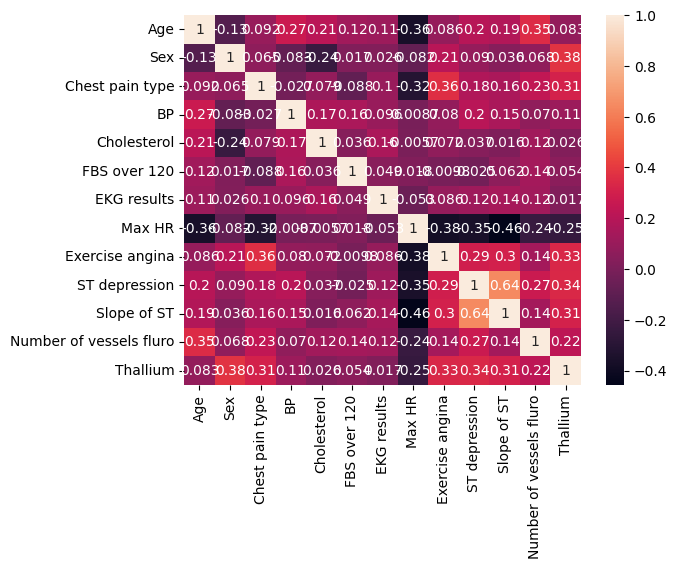

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

print(df1.corr())
dataplot = sb.heatmap(df1.corr(), annot=True)
plt.show()

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

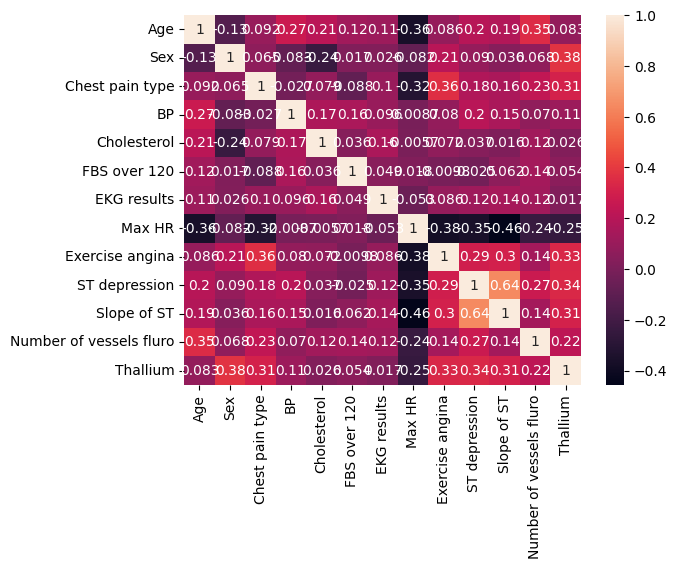

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

print(df2.corr())
dataplot = sb.heatmap(df1.corr(), annot=True)
plt.show()

#TRAIN TEST SPLIT (OF NORMALIZED, BALANCED, SPLIT)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df1, test_size=0.2)
train=train.reset_index().drop(['index'], axis='columns')
test=test.reset_index().drop(['index'], axis='columns')

In [ ]:
train

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.375000  1.0         1.000000  0.150943     0.340183           0.0   
1    0.479167  1.0         1.000000  0.132075     0.244292           1.0   
2    0.250000  1.0         0.333333  0.386792     0.175799           0.0   
3    0.354167  1.0         0.333333  0.066038     0.162100           1.0   
4    0.645833  1.0         1.000000  0.339623     0.289954           0.0   
..        ...  ...              ...       ...          ...           ...   
187  0.291667  0.0         0.666667  0.264151     0.198630           0.0   
188  0.583333  1.0         1.000000  0.358491     0.184932           0.0   
189  0.333333  0.0         0.333333  0.169811     0.077626           0.0   
190  0.604167  1.0         0.666667  0.169811     0.237443           0.0   
191  0.458333  1.0         0.666667  0.150943     0.111872           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            1.0  0.358779              1.0       0.161290          0.5   
1            0.0  0.580153              0.0       0.016129          0.0   
2            0.0  0.465649              0.0       0.000000          0.5   
3            0.0  0.648855              0.0       0.000000          0.0   
4            0.0  0.557252              1.0       0.225806          0.0   
..           ...       ...              ...            ...          ...   
187          0.0  0.717557              0.0       0.032258          0.5   
188          0.0  0.740458              1.0       0.000000          0.0   
189          0.0  0.511450              0.0       0.000000          0.5   
190          1.0  0.717557              0.0       0.403226          0.5   
191          0.0  0.396947              0.0       0.096774          0.0   

     Number of vessels fluro  Thallium  
0                   0.333333      0.00  
1                   1.000000      1.00  
2                   0.000000      0.75  
3                   0.000000      1.00  
4                   0.333333      1.00  
..                       ...       ...  
187                 0.000000      0.00  
188                 0.000000      1.00  
189                 0.000000      0.00  
190                 0.333333      1.00  
191                 0.000000      0.00  

[192 rows x 13 columns]

In [ ]:
test

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0   0.604167  1.0         1.000000  0.490566     0.210046           0.0   
1   0.312500  1.0         0.333333  0.245283     0.214612           0.0   
2   0.666667  1.0         1.000000  0.433962     0.184932           0.0   
3   0.770833  0.0         1.000000  0.792453     0.232877           1.0   
4   0.729167  1.0         0.000000  0.150943     0.194064           0.0   
5   0.583333  0.0         1.000000  0.320755     0.404110           0.0   
6   0.791667  1.0         1.000000  0.056604     0.394977           0.0   
7   0.583333  1.0         1.000000  0.150943     0.171233           0.0   
8   0.562500  1.0         0.666667  0.339623     0.296804           1.0   
9   0.000000  1.0         0.333333  0.339623     0.178082           0.0   
10  0.666667  0.0         1.000000  0.481132     0.413242           0.0   
11  0.854167  1.0         1.000000  0.481132     0.109589           0.0   
12  0.645833  1.0         1.000000  0.339623     0.182648           0.0   
13  0.291667  1.0         1.000000  0.528302     0.276256           0.0   
14  0.604167  1.0         1.000000  0.320755     0.303653           0.0   
15  0.250000  1.0         1.000000  0.150943     0.105023           0.0   
16  0.125000  1.0         1.000000  0.301887     0.356164           0.0   
17  0.479167  1.0         0.333333  0.377358     0.171233           0.0   
18  0.770833  1.0         1.000000  0.622642     0.232877           0.0   
19  0.520833  1.0         1.000000  0.150943     0.257991           0.0   
20  0.750000  0.0         1.000000  0.528302     0.226027           0.0   
21  0.750000  1.0         1.000000  0.245283     0.116438           0.0   
22  0.375000  1.0         0.666667  0.132075     0.267123           0.0   
23  0.187500  1.0         0.000000  0.245283     0.239726           0.0   
24  0.479167  1.0         0.333333  0.245283     0.454338           0.0   
25  0.708333  1.0         1.000000  0.339623     0.292237           0.0   
26  0.645833  1.0         0.666667  0.433962     0.134703           0.0   
27  0.583333  1.0         0.666667  0.528302     0.095890           0.0   
28  0.562500  0.0         1.000000  0.377358     0.646119           0.0   
29  0.979167  0.0         0.666667  0.433962     0.162100           0.0   
30  0.500000  0.0         1.000000  0.415094     0.246575           0.0   
31  0.416667  0.0         0.333333  0.377358     0.331050           0.0   
32  1.000000  1.0         1.000000  0.292453     0.406393           0.0   
33  0.812500  0.0         0.666667  0.245283     0.194064           0.0   
34  0.729167  1.0         0.666667  0.292453     0.417808           0.0   
35  0.604167  1.0         0.333333  0.245283     0.360731           0.0   
36  0.729167  1.0         1.000000  0.320755     0.312785           0.0   
37  0.791667  0.0         1.000000  0.113208     0.221461           0.0   
38  0.875000  0.0         0.333333  0.622642     0.401826           0.0   
39  0.645833  0.0         0.666667  0.075472     0.438356           0.0   
40  0.750000  0.0         0.666667  0.575472     0.326484           0.0   
41  0.708333  0.0         0.666667  0.386792     0.287671           0.0   
42  0.687500  1.0         1.000000  0.245283     0.321918           0.0   
43  0.729167  1.0         1.000000  0.245283     0.273973           0.0   
44  0.520833  1.0         0.333333  0.924528     0.358447           0.0   
45  0.750000  0.0         0.666667  0.622642     0.534247           0.0   
46  0.458333  1.0         1.000000  0.433962     0.394977           0.0   
47  0.250000  0.0         0.333333  0.103774     0.164384           0.0   

    EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0           0.0  0.259542              0.0       0.322581          0.5   
1           0.0  0.755725              0.0       0.000000          0.0   
2           1.0  0.511450              1.0       0.306452          0.0   
3           0.0  0.717557            

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mX, my, stratify=my, test_size=0.2)

In [ ]:
X_train

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
105  0.645833  0.0         1.000000  0.528302     0.301370           0.0   
237  0.791667  1.0         1.000000  0.292453     0.292237           1.0   
60   0.562500  1.0         0.666667  0.339623     0.296804           1.0   
238  0.583333  1.0         0.666667  0.320755     0.235160           0.0   
57   0.333333  1.0         1.000000  0.452830     0.417808           0.0   
..        ...  ...              ...       ...          ...           ...   
46   0.666667  0.0         1.000000  0.481132     0.413242           0.0   
109  0.458333  1.0         1.000000  0.433962     0.392694           0.0   
147  0.333333  0.0         0.333333  0.339623     0.246575           0.0   
92   0.625000  1.0         0.333333  0.433962     0.216895           0.0   
4    0.479167  1.0         1.000000  0.169811     0.237443           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
105          1.0  0.656489              0.0       0.419355          0.5   
237          0.0  0.702290              0.0       0.032258          0.5   
60           1.0  0.541985              1.0       0.096774          0.5   
238          1.0  0.603053              0.0       0.064516          0.5   
57           1.0  0.580153              1.0       0.000000          0.5   
..           ...       ...              ...            ...          ...   
46           1.0  0.572519              1.0       0.161290          0.5   
109          0.0  0.389313              1.0       0.677419          0.5   
147          1.0  0.793893              0.0       0.096774          0.5   
92           0.0  0.709924              1.0       0.000000          0.0   
4            0.0  0.679389              0.0       0.000000          0.0   

     Number of vessels fluro  Thallium  
105                 0.666667      1.00  
237                 0.666667      1.00  
60                  0.333333      0.75  
238                 0.333333      1.00  
57                  1.000000      1.00  
..                       ...       ...  
46                  0.000000      1.00  
109                 1.000000      1.00  
147                 0.000000      0.00  
92                  0.000000      0.00  
4                   0.333333      0.00  

[192 rows x 13 columns]

In [ ]:
y_train

Heart Disease
105      Presence
237      Presence
60       Presence
238      Presence
57       Presence
..            ...
46       Presence
109      Presence
147       Absence
92        Absence
4        Presence

[192 rows x 1 columns]

In [ ]:
dfp = y_train[y_train["Heart Disease"] == "Presence"]
Pos_count=len(dfp)
Pos_count

96

In [ ]:
X_test

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
133  0.604167  1.0         1.000000  0.292453     0.397260           0.0   
5    0.604167  1.0         1.000000  0.320755     0.205479           0.0   
144  0.416667  0.0         0.333333  0.377358     0.331050           0.0   
38   0.354167  1.0         1.000000  0.245283     0.280822           0.0   
146  0.604167  1.0         1.000000  0.528302     0.328767           0.0   
165  0.625000  1.0         1.000000  0.433962     0.116438           0.0   
77   0.708333  0.0         1.000000  0.132075     0.326484           0.0   
112  0.812500  1.0         0.666667  0.811321     0.337900           1.0   
219  0.791667  1.0         1.000000  0.245283     0.235160           0.0   
6    0.583333  1.0         0.666667  0.528302     0.000000           1.0   
149  0.416667  0.0         1.000000  0.339623     0.326484           0.0   
137  0.666667  0.0         1.000000  0.339623     0.465753           0.0   
58   0.687500  0.0         1.000000  0.283019     0.189498           0.0   
232  0.729167  1.0         1.000000  0.481132     0.196347           0.0   
67   0.604167  1.0         1.000000  0.490566     0.210046           0.0   
87   0.645833  1.0         1.000000  0.216981     0.237443           1.0   
230  0.750000  0.0         0.666667  0.433962     0.664384           1.0   
228  0.604167  1.0         0.666667  0.433962     0.194064           1.0   
170  0.104167  0.0         0.333333  0.226415     0.191781           0.0   
121  0.291667  1.0         0.666667  0.339623     0.431507           0.0   
15   0.458333  1.0         1.000000  0.433962     0.308219           0.0   
194  0.437500  1.0         1.000000  0.528302     0.267123           0.0   
152  0.562500  0.0         1.000000  0.377358     0.646119           0.0   
96   0.270833  1.0         0.333333  0.245283     0.385845           0.0   
233  0.583333  1.0         0.666667  0.528302     0.095890           0.0   
210  0.500000  1.0         0.666667  0.339623     0.162100           1.0   
160  0.583333  1.0         0.333333  0.283019     0.308219           0.0   
32   0.562500  0.0         1.000000  1.000000     0.369863           1.0   
26   0.291667  0.0         0.666667  0.264151     0.198630           0.0   
157  0.875000  0.0         0.666667  0.150943     0.317352           1.0   
127  0.104167  1.0         0.000000  0.226415     0.127854           0.0   
151  0.250000  1.0         0.333333  0.150943     0.248858           0.0   
86   0.291667  1.0         1.000000  0.245283     0.116438           0.0   
97   0.833333  1.0         0.000000  0.622642     0.246575           1.0   
125  0.312500  1.0         0.666667  0.433962     0.248858           0.0   
136  0.625000  1.0         1.000000  0.716981     0.456621           0.0   
204  0.791667  0.0         1.000000  0.113208     0.221461           0.0   
8    0.854167  1.0         0.666667  0.622642     0.326484           0.0   
81   0.458333  1.0         0.666667  0.056604     0.219178           0.0   
189  0.645833  1.0         1.000000  0.339623     0.182648           0.0   
212  0.625000  1.0         1.000000  0.386792     0.246575           0.0   
59   0.791667  0.0         0.666667  0.547170     0.344749           0.0   
208  0.125000  1.0         1.000000  0.301887     0.356164           0.0   
120  0.562500  1.0         1.000000  0.339623     0.358447           1.0   
45   0.437500  1.0         0.666667  0.433962     0.244292           0.0   
235  0.500000  1.0         1.000000  0.452830     0.228311           0.0   
63   0.541667  0.0         1.000000  0.811321     0.458904           0.0   
66   0.250000  0.0         0.333333  0.103774     0.164384           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
133          1.0  0.763359              0.0       0.000000          0.0   
5            1.0  0.458015              1.0       0.354839          0.5   
144          0.0  0.694656              0.0       0.000000  

#STRATIFIED TRAIN TEST SPLIT (IMABALNCED)

In [ ]:
sX_train, sX_test, sy_train, sy_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


In [ ]:
sy_train = pd.DataFrame(sy_train)
sy_train=sy_train.reset_index()

In [ ]:
sy_train=sy_train.drop('index', axis=1)

In [ ]:
dfp = sy_test[sy_test["Heart Disease"] == "Absence"]
Pos_count=len(dfp)
Pos_count

30

In [ ]:
sX_train

Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
59   0.687500  1.0         0.333333  0.245283     0.353881           0.0   
238  0.375000  1.0         0.666667  0.415094     0.299087           0.0   
207  0.604167  1.0         0.666667  0.103774     0.260274           0.0   
146  0.479167  1.0         1.000000  0.169811     0.237443           0.0   
169  0.750000  1.0         0.000000  0.415094     0.356164           1.0   
..        ...  ...              ...       ...          ...           ...   
69   0.375000  1.0         0.666667  0.132075     0.267123           0.0   
45   0.604167  1.0         0.666667  0.433962     0.194064           1.0   
102  0.416667  0.0         1.000000  0.339623     0.326484           0.0   
6    0.562500  1.0         0.666667  0.339623     0.296804           1.0   
161  0.687500  0.0         1.000000  0.528302     0.269406           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
59           1.0  0.244275              0.0       0.225806          0.5   
238          1.0  0.648855              0.0       0.000000          0.0   
207          1.0  0.633588              1.0       0.096774          0.5   
146          0.0  0.679389              0.0       0.000000          0.0   
169          1.0  0.786260              0.0       0.225806          0.5   
..           ...       ...              ...            ...          ...   
69           0.0  0.618321              0.0       0.000000          0.0   
45           1.0  0.717557              0.0       0.000000          0.0   
102          0.0  0.702290              0.0       0.000000          0.0   
6            1.0  0.541985              1.0       0.096774          0.5   
161          0.0  0.633588              1.0       0.225806          0.5   

     Number of vessels fluro  Thallium  
59                  0.333333      1.00  
238                 0.000000      0.00  
207                 0.000000      1.00  
146                 0.333333      0.00  
169                 0.333333      0.00  
..                       ...       ...  
69                  0.000000      0.00  
45                  0.000000      0.00  
102                 0.000000      0.00  
6                   0.333333      0.75  
161                 0.000000      0.00  

[216 rows x 13 columns]

In [ ]:
sy_train

Heart Disease
0        Presence
1         Absence
2         Absence
3        Presence
4        Presence
..            ...
211      Presence
212       Absence
213       Absence
214      Presence
215      Presence

[216 rows x 1 columns]

In [ ]:
len(sy_test)

54

#K-NN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

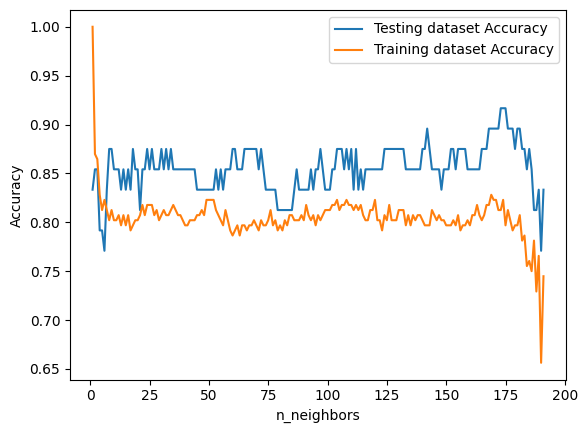

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

neighbors = np.arange(1, 192)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

##Using Trial and Error to find best K-value using TRAIN TEST SPLIT

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

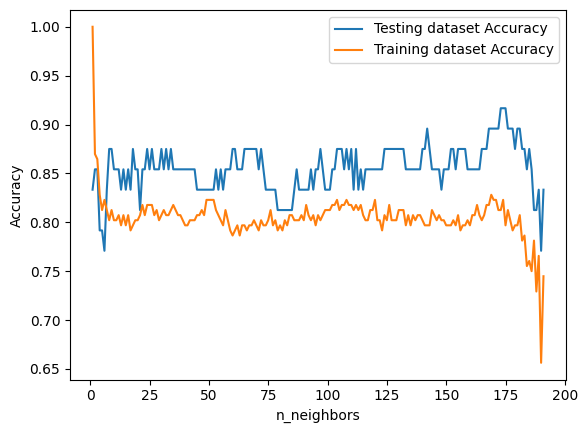

In [ ]:
neighborsSS = np.arange(45, 55)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
for i, k in enumerate(neighborsSS):
    print(i, k)

0 45
1 46
2 47
3 48
4 49
5 50
6 51
7 52
8 53
9 54


In [ ]:
print(train_accuracy[20], test_accuracy[20]) #using the empirically optimal value of k, i.e. k = 21

0.8072916666666666 0.8125


In [ ]:
print(train_accuracy[12], test_accuracy[12]) #using the theoretically optimal value of k, i.e. k = N^0.5 = 13

0.796875 0.8333333333333334


###K=73

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

knn = KNeighborsClassifier(n_neighbors=73)
knn.fit(X_train, y_train)
y_test_predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix for k=73

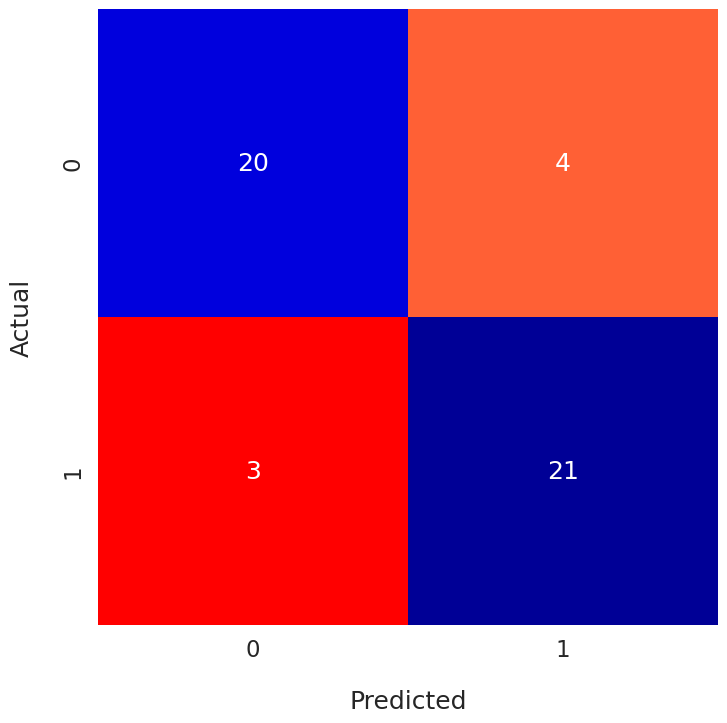

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

Accuracy = 0.8541666666666666


Precision, Recall, F1 score

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
precision = precision_score(y_test, y_test_predictions, pos_label='Presence')
recall = recall_score(y_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(y_test, y_test_predictions, pos_label='Presence')


print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.8541666666666666
Precision = 0.84
Recall = 0.875
F1 Score = 0.8571428571428572


###k=13

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_test_predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix for k=13

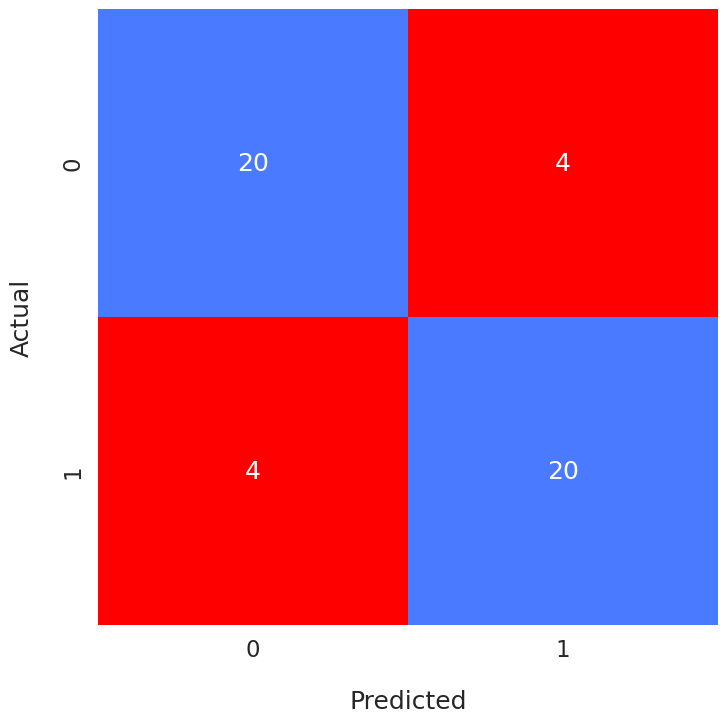

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

Accuracy = 0.8333333333333334


In [ ]:
precision = precision_score(y_test, y_test_predictions, pos_label='Presence')
recall = recall_score(y_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(y_test, y_test_predictions, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8333333333333334
Recall = 0.8333333333333334
F1 Score = 0.8333333333333334


###k=21

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
y_test_predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix for k=21

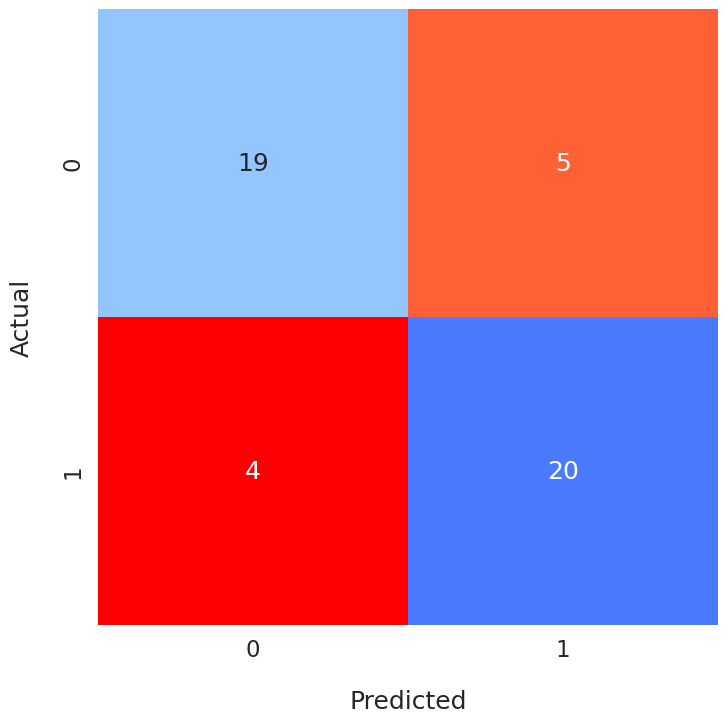

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

Accuracy = 0.8125


In [ ]:
precision = precision_score(y_test, y_test_predictions, pos_label='Presence')
recall = recall_score(y_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(y_test, y_test_predictions, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8
Recall = 0.8333333333333334
F1 Score = 0.816326530612245


##Using GridSearchCV to find best k-value, on train_test_split data, using test dataset for performance evaluation (IMBALANCED)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [1, 2]
dist_metric = ['cosine', 'minkowski', 'euclidean', 'haversine']
param_grid = dict(n_neighbors=k_range, algorithm = algorithm, p = p_values,
                  metric=dist_metric)


# defining parameter range

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
grid = GridSearchCV(knn, param_grid, cv=stratified_cv, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(sX_train, sy_train)

Fitting 10 folds for each of 3168 candidates, totalling 31680 fits


Streaming output truncated to the last 5000 lines.
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py", line 277, in compute
    return ArgKmin64.compute(
  File "sklearn/metrics/_pairwise_distances_reduction/_argkmin.pyx", line 87, in sklearn.metrics._pairwise_distances_reduction._argkmin.ArgKmin64.compute
  Fil

In [ ]:
print(grid_search.best_params_)
k_best = grid_search.best_params_.get('n_neighbors')
print(grid_search.best_estimator_)
model_best=grid_search.best_estimator_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 38, 'p': 1}
KNeighborsClassifier(n_neighbors=38, p=1)


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#knn = KNeighborsClassifier(n_neighbors=k_best)
#knn.fit(X_train, y_train)
#y_test_predictions = knn.predict(X_test)

knn = model_best
knn.fit(sX_train, sy_train)
y_test_predictions = knn.predict(sX_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


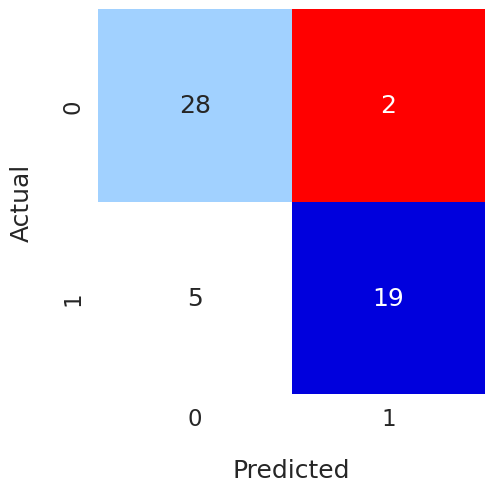

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_test_predictions)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_test_predictions = pd.DataFrame(y_test_predictions, columns = ['Heart Disease'])

In [ ]:
accuracy = accuracy_score(sy_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

Accuracy = 0.8703703703703703


In [ ]:
precision = precision_score(sy_test, y_test_predictions, pos_label='Presence')
recall = recall_score(sy_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(sy_test, y_test_predictions, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9047619047619048
Recall = 0.7916666666666666
F1 Score = 0.8444444444444444


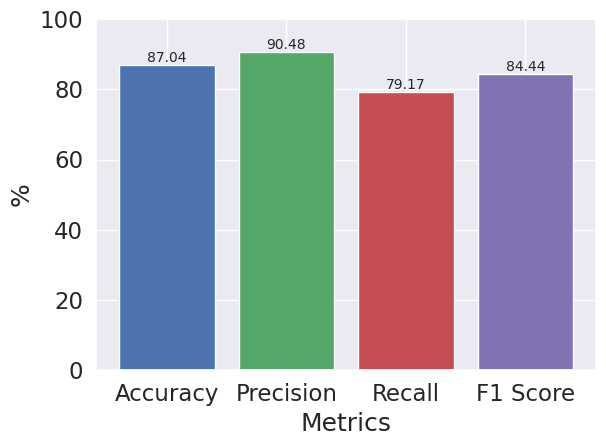

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
knn.score(sX_test, sy_test)

0.8703703703703703

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(sy_test, y_test_predictions))

              precision    recall  f1-score   support

     Absence       0.85      0.93      0.89        30
    Presence       0.90      0.79      0.84        24

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



##Using GridSearchCV to find best k-value, on train_test_split data, using test dataset for performance evaluation (BALANCED)

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [1, 2]
dist_metric = ['cosine', 'minkowski', 'euclidean', 'haversine']
param_grid = dict(n_neighbors=k_range, algorithm = algorithm, p = p_values,
                  metric=dist_metric)


# defining parameter range

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=stratified_cv, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 3168 candidates, totalling 31680 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KeyboardInterrupt: ignored

In [ ]:
print(grid_search.best_params_)
k_best = grid_search.best_params_.get('n_neighbors')
print(grid_search.best_estimator_)
model_best=grid_search.best_estimator_

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#knn = KNeighborsClassifier(n_neighbors=k_best)
#knn.fit(X_train, y_train)
#y_test_predictions = knn.predict(X_test)

knn = model_best
knn.fit(X_train, y_train)
y_test_predictions = knn.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_test_predictions = pd.DataFrame(y_test_predictions, columns = ['Heart Disease'])

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

In [ ]:
precision = precision_score(y_test, y_test_predictions, pos_label='Presence')
recall = recall_score(y_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(y_test, y_test_predictions, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
knn.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predictions))

##Using Gridsearchcv and Stratified K-fold CV on WHOLE DATASET instead of train test split

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 200))
param_grid = dict(n_neighbors=k_range)

stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)

grid_search=grid.fit(X, y)
#grid_search=grid.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, X, y, cv=stratified_cv)

In [ ]:
knn0 = best_model
knn0.fit(X_train, y_train)
y_test_predictions = knn0.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predictions)
precision = precision_score(y_test, y_test_predictions, pos_label='Presence')
recall = recall_score(y_test, y_test_predictions, pos_label='Presence')
f1score = f1_score(y_test, y_test_predictions, pos_label='Presence')


print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, X, y, cv=10)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(y, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

##using gridsearcgcv with stratified cv on balanced/reduced dataset

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 200))
param_grid = dict(n_neighbors=k_range)

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search
grid_search=grid.fit(mX, my)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, mX, my, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, mX, my, cv=stratified_cv)

accuracy = accuracy_score(my, predicted_labels)
precision = precision_score(my, predicted_labels, average='weighted')
recall = recall_score(my, predicted_labels, average='weighted')
f1 = f1_score(my, predicted_labels, average='weighted')

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(my, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

#SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##Using Trial-error, on Test-Train split dataset, using test for performance eval

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=3.26)  # You can experiment with different kernels and hyperparameters

In [ ]:
svm_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
precision = precision_score(y_test, y_pred, pos_label='Presence')
recall = recall_score(y_test, y_pred, pos_label='Presence')
f1score = f1_score(y_test, y_pred, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

##Using GridSearchCV on Train-test split, with test dataset as permonce evaluation (IMBALANCED)

In [ ]:
from sklearn.model_selection import GridSearchCV

class_weight = {'Absence': 0.9, 'Presence': 1.125}

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(svm.SVC(gamma='auto', class_weight=class_weight), {
    'C': [0.01,
          0.02, 0.03, 0.04, 0.05,
          0.06, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1
          #0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5
                  ],
          #,1,10,20],
    #'C' : list(range(1, 30)),
    'kernel': ['rbf', 'linear']
}, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=clf.fit(sX_train, sy_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00610933, 0.00520461, 0.00621018, 0.00486341, 0.00582471,
        0.00462523, 0.00588379, 0.00459318, 0.00563521, 0.00518069,
        0.00560348, 0.00456827, 0.00603263, 0.00452158, 0.0056211 ,
        0.00491495, 0.00535383, 0.00475991, 0.00546505, 0.00585902,
        0.00533354, 0.00482464, 0.00551283, 0.00495479, 0.00537181,
        0.00508077, 0.00596073, 0.00502305, 0.00543542, 0.00554872,
        0.00557399, 0.0047626 , 0.00622346, 0.00526369, 0.00580878,
        0.00445063, 0.00612762, 0.00719388, 0.01022749, 0.00857019,
        0.00892291, 0.00710623, 0.00898712, 0.00707867, 0.00894914,
        0.00733407, 0.0087749 , 0.00795264, 0.00910809, 0.00703182,
        0.00909755, 0.00781007, 0.00889881, 0.00723882]),
 'std_fit_time': array([0.00091274, 0.00034724, 0.00098692, 0.000161  , 0.0009499 ,
        0.00016114, 0.00119134, 0.00013012, 0.00067497, 0.00111184,
        0.00059434, 0.0001382 , 0.00133383, 0.00025137, 0.00027207,
        0.00085292, 0.000

In [ ]:
print(grid_search.best_params_)
C_best = grid_search.best_params_.get('C')
kernel_best = grid_search.best_params_.get('kernel')
print(grid_search.best_estimator_)
model_best = grid_search.best_estimator_

{'C': 0.02, 'kernel': 'linear'}
SVC(C=0.02, class_weight={'Absence': 0.9, 'Presence': 1.125}, gamma='auto',
    kernel='linear')


In [ ]:
svm_model = model_best

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(sX_train)
X_test_scaled = scaler.transform(sX_test)

In [ ]:
svm_model.fit(X_train_scaled, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.02, class_weight={'Absence': 0.9, 'Presence': 1.125}, gamma='auto',
    kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_pred = pd.DataFrame(y_pred, columns = ['Heart Disease'])

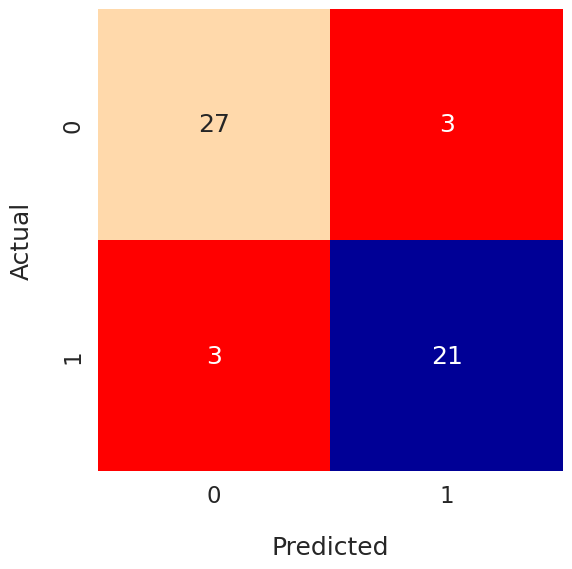

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_pred)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(sy_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


In [ ]:
precision = precision_score(sy_test, y_pred, pos_label='Presence')
recall = recall_score(sy_test, y_pred, pos_label='Presence')
f1score = f1_score(sy_test, y_pred, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.875
Recall = 0.875
F1 Score = 0.875


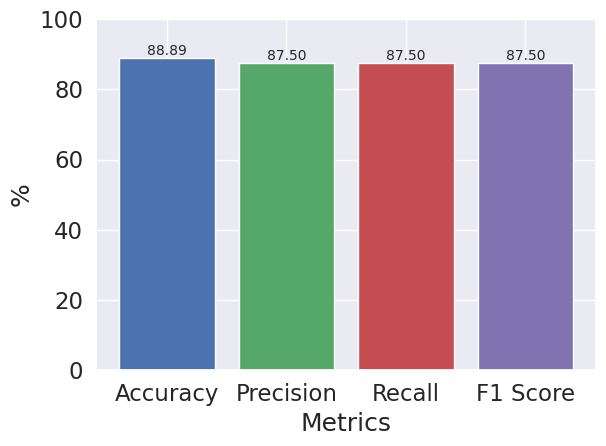

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(sy_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.90      0.90      0.90        30
    Presence       0.88      0.88      0.88        24

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



##Using GridSearchCV on Train-test split, with test dataset as permonce evaluation (BALANCED)

In [ ]:
from sklearn.model_selection import GridSearchCV

class_weight = {'Absence': 0.9, 'Presence': 1.125}

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(svm.SVC(gamma='auto', class_weight=class_weight), {
    'C': [0.01,
          0.02, 0.03, 0.04, 0.05,
          0.06, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1
          #0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5
                  ],
          #,1,10,20],
    #'C' : list(range(1, 30)),
    'kernel': ['rbf', 'linear']
}, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=clf.fit(X_train, y_train)

In [ ]:
clf.cv_results_

In [ ]:
print(grid_search.best_params_)
C_best = grid_search.best_params_.get('C')
kernel_best = grid_search.best_params_.get('kernel')
print(grid_search.best_estimator_)
model_best = grid_search.best_estimator_

In [ ]:
svm_model = model_best

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_pred = pd.DataFrame(y_pred, columns = ['Heart Disease'])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
precision = precision_score(y_test, y_pred, pos_label='Presence')
recall = recall_score(y_test, y_pred, pos_label='Presence')
f1score = f1_score(y_test, y_pred, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

##K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(SVC(gamma='auto'), X_train, y_train, cv=10)

In [ ]:
print("Cross-Validation Scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

##Stratified Kfold cv with GridsearchCV (on imbalanced/whole dataset)

In [ ]:
from sklearn.model_selection import GridSearchCV

stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    #'C': [1,10,20],
    'C' : list(range(1, 30)),
    'kernel': ['rbf','linear']
}, cv=stratified_cv, scoring='accuracy', return_train_score=False)
grid_search=clf.fit(X, y)


In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, X, y, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, X, y, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(y, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

##Stratified Kfold cv with GridsearchCV (on balance/reduced dataset)

In [ ]:
from sklearn.model_selection import GridSearchCV

stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    #'C' : list(range(1, 30)),
    'kernel': ['rbf','linear']
}, cv=stratified_cv, scoring='accuracy', return_train_score=False)
grid_search=clf.fit(mX, my)


In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, mX, my, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, mX, my, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(my, predicted_labels)
precision = precision_score(my, predicted_labels, average='weighted')
recall = recall_score(my, predicted_labels, average='weighted')
f1 = f1_score(my, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(my, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_predicted = pd.DataFrame(y_predicted, columns = ['Heart Disease'])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

##Using GridSearchCV on Train-test split data, using test data for perfomance evaluation (IMBALANCED)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=42,
                                          class_weight = {'Absence': 0.9, 'Presence': 1.125}
                                          ), {
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [2,3, 4, 5, 6, 8, 10, 12]
}, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=clf.fit(sX_train, sy_train)


Fitting 15 folds for each of 88 candidates, totalling 1320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print(grid_search.best_params_)
n_best = grid_search.best_params_.get('n_estimators')
print(n_best)
model_best = grid_search.best_estimator_
print(model_best)

{'max_depth': 6, 'n_estimators': 90}
90
RandomForestClassifier(class_weight={'Absence': 0.9, 'Presence': 1.125},
                       max_depth=6, n_estimators=90, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = model_best
model.fit(sX_train, sy_train)

<ipython-input-139-e4aa396a1fcb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(sX_train, sy_train)


RandomForestClassifier(class_weight={'Absence': 0.9, 'Presence': 1.125},
                       max_depth=6, n_estimators=90, random_state=42)

In [ ]:
model.score(sX_test, sy_test)

0.8518518518518519

In [ ]:
y_predicted = model.predict(sX_test)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_predicted = pd.DataFrame(y_predicted, columns = ['Heart Disease'])

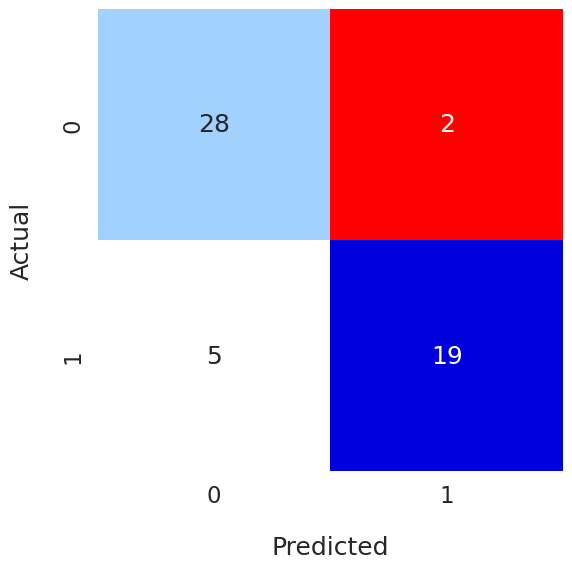

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(sy_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8703703703703703


In [ ]:
precision = precision_score(sy_test, y_predicted, pos_label='Presence')
recall = recall_score(sy_test, y_predicted, pos_label='Presence')
f1score = f1_score(sy_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9047619047619048
Recall = 0.7916666666666666
F1 Score = 0.8444444444444444


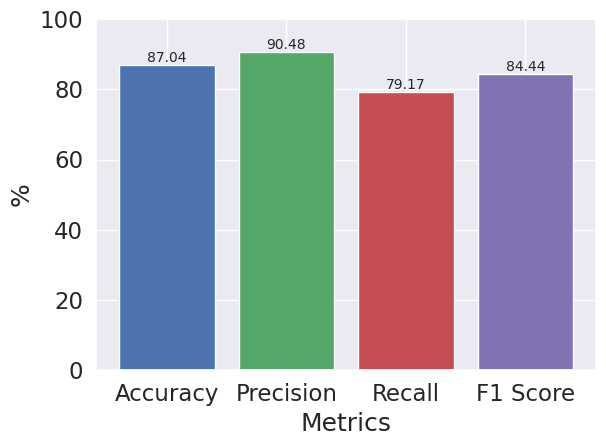

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(sy_test, y_predicted))

              precision    recall  f1-score   support

     Absence       0.85      0.93      0.89        30
    Presence       0.90      0.79      0.84        24

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



##Using GridSearchCV on Train-test split data, using test data for perfomance evaluation (BALANCED)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=42), {
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [2,3, 4, 5, 6, 8, 10, 12]
}, cv=stratified_cv, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=clf.fit(X_train, y_train)


In [ ]:
print(grid_search.best_params_)
n_best = grid_search.best_params_.get('n_estimators')
print(n_best)
model_best = grid_search.best_estimator_
print(model_best)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = model_best
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_predicted = pd.DataFrame(y_predicted, columns = ['Heart Disease'])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

In [ ]:
precision = precision_score(y_test, y_predicted, pos_label='Presence')
recall = recall_score(y_test, y_predicted, pos_label='Presence')
f1score = f1_score(y_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_test, y_predicted))

##K-fold cross validation

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
k = 10
scores = cross_val_score(rf, X_train, y_train, cv=k, scoring='accuracy')

print("Cross-Validation Scores:", scores)

In [ ]:
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

##Using GridSearchCV with StratifiedKFoldCV over WHOLE dataset

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(rf, {
    #'n_estimators' : list(range(5, 100),
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [2,3, 4, 5, 6, 8, 10, 12]
}, cv=stratified_cv, scoring='accuracy', return_train_score=False)
grid_search=clf.fit(X, y)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, X, y, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, X, y, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(y, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

##Using GridSearchCV with StratifiedKFoldCV over BALANCED/REDUCED dataset

In [ ]:
from sklearn.model_selection import GridSearchCV

stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
clf = GridSearchCV(RandomForestClassifier(random_state=42), {
    #'n_estimators' : list(range(5, 100),
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [2,3, 4, 5, 6, 8, 10, 12]
}, cv=stratified_cv, scoring='accuracy', return_train_score=False)
grid_search=clf.fit(mX, my)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, mX, my, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, mX, my, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(my, predicted_labels)
precision = precision_score(my, predicted_labels, average='weighted')
recall = recall_score(my, predicted_labels, average='weighted')
f1 = f1_score(my, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(my, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

#LOGISTIC REGRESSION

##Using GridSearchCV on Train-test split data, using test data for perfomance evaluation (IMBALANCED)

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
adaboost_classifier = sklearn.linear_model.LogisticRegression(class_weight={'Absence': 0.9, 'Presence': 1.125})
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
param_grid = {
    'penalty': [
                #'none',
                'l1', 'l2', 'elasticnet'],  # Number of weak learners (Decision Trees)
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],  # Learning rate for each weak learner
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(sX_train, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight={'Absence': 0.9,
                                                        'Presence': 1.125}),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=10, class_weight={'Absence': 0.9, 'Presence': 1.125},
                   solver='liblinear')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = best_model
model.fit(sX_train, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight={'Absence': 0.9, 'Presence': 1.125},
                   solver='liblinear')

In [ ]:
model.score(sX_test, sy_test)

0.8518518518518519

In [ ]:
y_predicted = model.predict(sX_test)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_predicted = pd.DataFrame(y_predicted, columns = ['Heart Disease'])

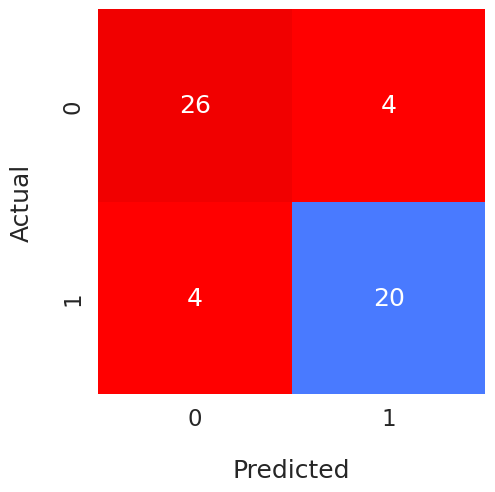

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5
                    ))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(sy_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8518518518518519


In [ ]:
precision = precision_score(sy_test, y_predicted, pos_label='Presence')
recall = recall_score(sy_test, y_predicted, pos_label='Presence')
f1score = f1_score(sy_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8333333333333334
Recall = 0.8333333333333334
F1 Score = 0.8333333333333334


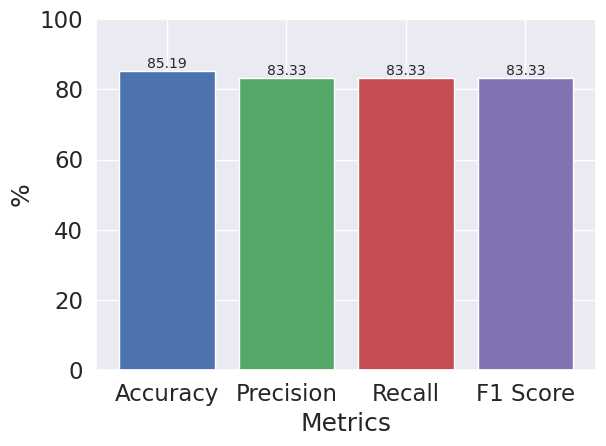

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(sy_test, y_predicted))

              precision    recall  f1-score   support

     Absence       0.87      0.87      0.87        30
    Presence       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



##Using GridSearchCV on Train-test split data, using test data for perfomance evaluation (BALANCED)

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
adaboost_classifier = sklearn.linear_model.LogisticRegression(class_weight={'Absence': 0.9, 'Presence': 1.125})
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
param_grid = {
    'penalty': [
                #'none',
                'l1', 'l2', 'elasticnet'],  # Number of weak learners (Decision Trees)
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],  # Learning rate for each weak learner
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = best_model
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_test.reset_index().drop(['index'], axis=1)
y_predicted = pd.DataFrame(y_predicted, columns = ['Heart Disease'])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

In [ ]:
precision = precision_score(y_test, y_predicted, pos_label='Presence')
recall = recall_score(y_test, y_predicted, pos_label='Presence')
f1score = f1_score(y_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

##GridSearchCV with stratifiedKfoldCV on imbalanced/whole dataset

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
adaboost_classifier = sklearn.linear_model.LogisticRegression(class_weight={'Absence': 0.9, 'Presence': 1.125})
stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'penalty': [
                #'none',
                'l1', 'l2', 'elasticnet'],  # Number of weak learners (Decision Trees)
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],  # Learning rate for each weak learner
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(X, y)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, X, y, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, X, y, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(y, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

##GridSearchCV with stratifiedKfoldCV on balanced/reduced dataset

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
adaboost_classifier = sklearn.linear_model.LogisticRegression(class_weight={'Absence': (150/270), 'Presence':(120/270)})
stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'penalty': [
                #'none',
                'l1', 'l2', 'elasticnet'],  # Number of weak learners (Decision Trees)
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],  # Learning rate for each weak learner
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(mX, my)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, mX, my, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, mX, my, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(my, predicted_labels)
precision = precision_score(my, predicted_labels, average='weighted')
recall = recall_score(my, predicted_labels, average='weighted')
f1 = f1_score(my, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(my, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

#ADABOOST

##GridSearchCV with stratified KFoldCV with Train-Test data for performance eval (IMBALANCE)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
adaboost_classifier = AdaBoostClassifier()


stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'estimator' : [SVC(C=0.02, class_weight={'Absence': 0.9, 'Presence': 1.125}, gamma='auto',
    kernel='linear')]
    'n_estimators': [10, 25, 50, 75, 100, 125
                     #, 150, 175, 200
                     ],
    'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 1.0],  # Learning rate for each weak learner
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(sX_train, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09,
                                           0.1, 1.0],
                         'n_estimators': [10, 25, 50, 75, 100, 125]},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = best_model
model.fit(sX_train, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.05, n_estimators=100)

In [ ]:
model.score(sX_test, sy_test)

0.9074074074074074

In [ ]:
y_predicted = model.predict(sX_test)

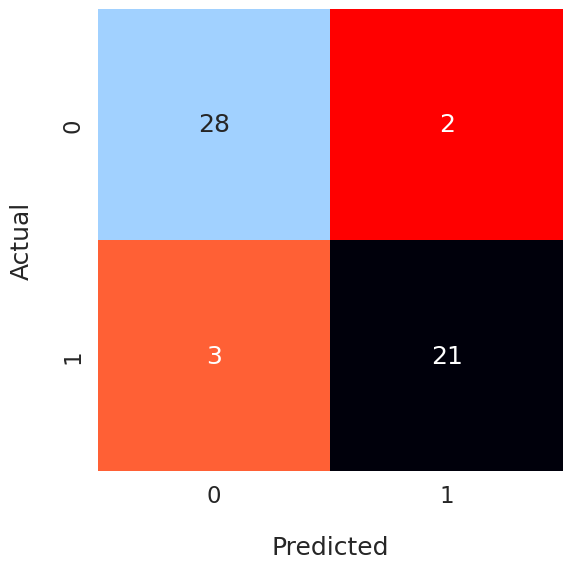

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(sy_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9074074074074074


In [ ]:
print(classification_report(sy_test, y_predicted))

              precision    recall  f1-score   support

     Absence       0.90      0.93      0.92        30
    Presence       0.91      0.88      0.89        24

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
precision = precision_score(sy_test, y_predicted, pos_label='Presence')
recall = recall_score(sy_test, y_predicted, pos_label='Presence')
f1score = f1_score(sy_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9130434782608695
Recall = 0.875
F1 Score = 0.8936170212765957


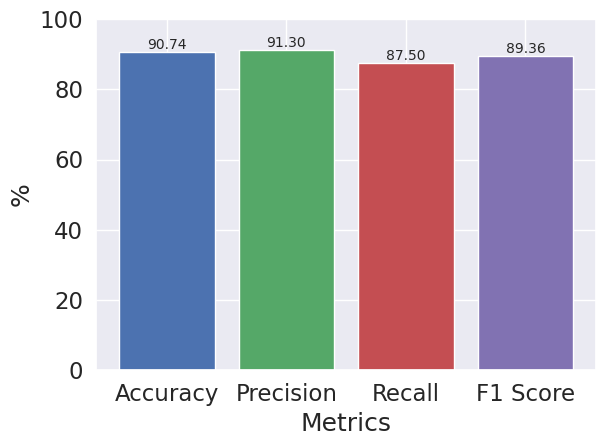

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


##GridSearchCV with stratified KFoldCV with Train-Test data for performance eval (BALANCE)

In [ ]:
adaboost_classifier = AdaBoostClassifier()


stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 125
                     #, 150, 175, 200
                     ],
    'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 1.0],  # Learning rate for each weak learner
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = best_model
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
precision = precision_score(y_test, y_predicted, pos_label='Presence')
recall = recall_score(y_test, y_predicted, pos_label='Presence')
f1score = f1_score(y_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


##GridSearchCV with DIFFERENT ESTIMATORS

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
adaboost_classifier = AdaBoostClassifier()


stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'estimator' : [SVC(C=0.02, class_weight={'Absence': 0.9, 'Presence': 1.125}, gamma='auto',
    kernel='linear'), None, DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=4), KNeighborsClassifier(n_neighbors=38, p=1)],
    'n_estimators': [10, 25, 50, 75, 100, 125
                     #, 150, 175, 200
                     ],
    'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 1.0],  # Learning rate for each weak learner
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(sX_train, sy_train)

Streaming output truncated to the last 5000 lines.
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'estimator': [SVC(C=0.02,
                                           class_weight={'Absence': 0.9,
                                                         'Presence': 1.125},
                                           gamma='auto', kernel='linear'),
                                       None,
                                       DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=4),
                                       KNeighborsClassifier(n_neighbors=38,
                                                            p=1)],
                         'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09,
                                           0.1, 1.0],
                         'n_estimators': [10, 25, 50, 75, 100, 125]},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'estimator': None, 'learning_rate': 0.05, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = best_model
model.fit(sX_train, sy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.05, n_estimators=100)

In [ ]:
model.score(sX_test, sy_test)

0.9074074074074074

In [ ]:
y_predicted = model.predict(sX_test)

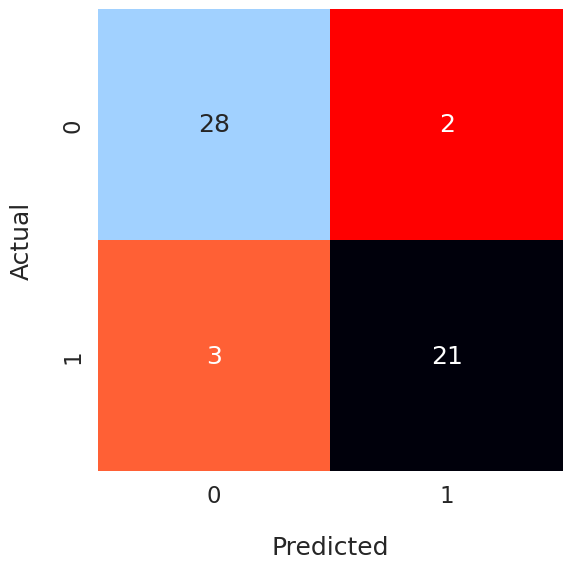

In [ ]:
conf_matrix = confusion_matrix(sy_test, y_predicted)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
accuracy = accuracy_score(sy_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9074074074074074


In [ ]:
print(classification_report(sy_test, y_predicted))

              precision    recall  f1-score   support

     Absence       0.90      0.93      0.92        30
    Presence       0.91      0.88      0.89        24

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
precision = precision_score(sy_test, y_predicted, pos_label='Presence')
recall = recall_score(sy_test, y_predicted, pos_label='Presence')
f1score = f1_score(sy_test, y_predicted, pos_label='Presence')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9130434782608695
Recall = 0.875
F1 Score = 0.8936170212765957


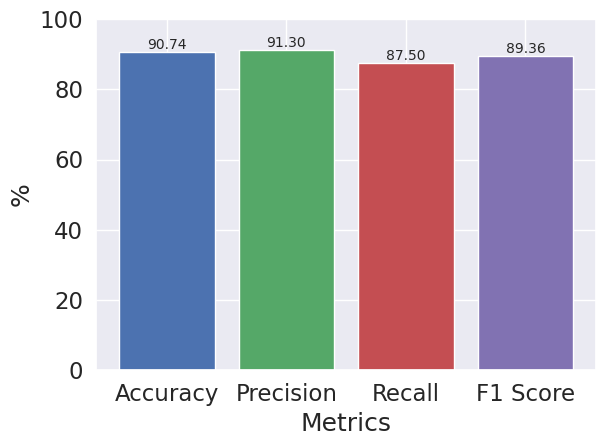

In [ ]:
import matplotlib.pyplot as plt

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy*100, precision*100, recall*100, f1score*100]

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
plt.bar(categories, values, color=colors)

for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylim(0, 100)
plt.xlabel('Metrics')
plt.ylabel('%')

plt.tight_layout()
plt.show()


##GridSearchCV with stratifiedCV on imbalanced/whole dataset

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
adaboost_classifier = AdaBoostClassifier()


stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],  # Number of weak learners (Decision Trees)
    'learning_rate': [0.001, 0.01, 0.1, 1.0],  # Learning rate for each weak learner
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(X, y)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, X, y, cv=stratified_cv)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, X, y, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')

# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(y, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

##GridSearchCV with stratifiedCV on balanced/reduced dataset

In [ ]:
adaboost_classifier = AdaBoostClassifier()

stratified_cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],  # Number of weak learners (Decision Trees)
    'learning_rate': [0.001, 0.01, 0.1, 1.0],  # Learning rate for each weak learner
}
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_cv, scoring='accuracy')

grid_search.fit(mX, my)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(best_model, mX, my, cv=10)

In [ ]:
mean_score = np.mean(cvscores, axis = 0)
print(mean_score)

In [ ]:
predicted_labels = cross_val_predict(best_model, mX, my, cv=stratified_cv)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(my, predicted_labels)
precision = precision_score(my, predicted_labels, average='weighted')
recall = recall_score(my, predicted_labels, average='weighted')
f1 = f1_score(my, predicted_labels, average='weighted')


# Print the results
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
conf_matrix = confusion_matrix(my, predicted_labels)
conf_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the algorithms and their performance metrics
algorithms = ['KNN', 'SVM', 'RF', 'LR', 'AdaBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Sample performance data for each algorithm and metric (replace with your actual data)
data = np.array([
    [77.78, 77.27, 70.83, 73.91],
    [85.19, 78.57, 91.67, 84.62],
    [87.04, 90.48, 79.17, 84.44],
    [85.19, 78.57, 91.67, 84.62],
    [90.74, 91.30, 87.50, 89.36]
])


# Define colors for bars
colors = ['#3376BD', '#00798C', '#E63946', '#EDAE49', '#52489C']

# Set the width of each bar group
bar_width = 0.14
group_gap = 0.1

# Create a bar for each algorithm and metric
for i, algo in enumerate(algorithms):
    x = np.arange(len(metrics)) + i * bar_width
    plt.bar(x, data[i], bar_width, label=algo, color=colors[i])
    for j, value in enumerate(data[i]):
        plt.text(x[j], value+0.12, f'{value:.2f}', ha='center', va='bottom', fontsize=4.9)



plt.ylim(50, 100)

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.xticks(np.arange(len(metrics)) + (bar_width * (len(algorithms) - 1)) / 2, metrics)
plt.legend(loc='lower left')


plt.tight_layout()
plt.show()



#XGBOOST

##GridSearchCV with stratified KFoldCV with Train-Test data for performance eval (IMBALANCE)